In [1]:
# in colab notebook, using packages through mounted google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# install tellurium if necessary -- will need to restart runtime if so
IS_COLAB = True
if IS_COLAB:
  try:
    import tellurium as te
  except:
    !pip install -q tellurium
    import tellurium as te

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tellurium as te

In [4]:
# move to drive folder to access package
%cd gdrive/MyDrive/

/content/gdrive/MyDrive


In [5]:
# import protomer_network class
from protomer_network_distributions import protomer_network

In [8]:
"""
Create instance of protomer_network class using an input dictionary
This dictionary contains, at the very least, the dissociation constants (affinities) of all dimer species for every protomer that may be in network
In this case, protomer species are A, B, C and so possible dimers are A_B, A_C, B_C
The two protomers are separated by an underscore (order does not matter), and dissocation constants are input as floats

"""

input_dict = {
              'A_B':10*10**-9,
              'A_C':100*10**-9,
              'B_C':1*10**-9
             }

basic_example1 = protomer_network(input_dict)

Model Summary:

A + B -> A_B; on_A_B*A*B 
A_B -> A + B; off_A_B*A_B 
A + C -> A_C; on_A_C*A*C 
A_C -> A + C; off_A_C*A_C 
B + C -> B_C; on_B_C*B*C 
B_C -> B + C; off_B_C*B_C 
 
on_A_B = 8000000000 
off_A_B = 80.0 
on_A_C = 8000000000 
off_A_C = 800.0000000000001 
on_B_C = 8000000000 
off_B_C = 8.0 
 
A = 1e-08 
B = 1e-08 
C = 1e-08 




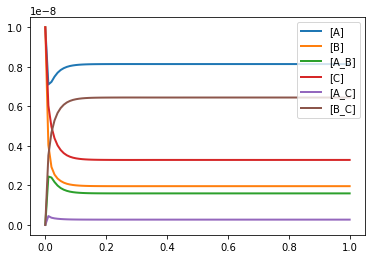

{'A': 8.137479612889245e-09, 'B': 1.9603038592834008e-09, 'A_B': 1.5952107166757688e-09, 'C': 3.2877496354884126e-09, 'A_C': 2.6754224297600977e-10, 'B_C': 6.444717996581862e-09}


In [11]:
"""
To run a simulation, provide a sub dictionary containing every protomer desired in the protomer network. In this case, we will use all 3 (A, B, C)
To simulate an output signal, provide a 'label' for any protomer species with one half of a split heterodimeric reporter
The options for labels are True or False, where only a dimer bringing together opposite labels will result in a signal
In this case, B has True and C has False, so the dimer B_C will create a signal
Running the SimulateEquilibriumSpeciesDistribution method will print out the model summary and show the time series of the simulation reaching equilibrium
The method returns a dictionary of each species and its concentration at equilibrium (the equilibrium distribution)

"""

sub_dict = {
            'A':{},
            'B':{'label':True},
            'C':{'label':False}
           }

equilibrium_distribution1 = basic_example1.SimulateEquilibriumSpeciesDistribution(sub_dict)
print(equilibrium_distribution1)

In [15]:
"""
The PredictBinaryOutput method will use the equilibrium distribution and labels of the most recent simulation to predict output
The signal is the summed concentrations of dimeric species with opposite labels
If this signal is above a threshold (default signal_threshold = 5 * 10**-9), returns True, else False
The method can also return the cumulative signal rather than a boolean

"""

binary_output1 = example1.PredictBinaryOutput()
print(binary_output1)
cumulative_signal1 = example1.PredictBinaryOutput(return_cumulative_signal=True)
print(cumulative_signal1)

True
6.444717996581862e-09


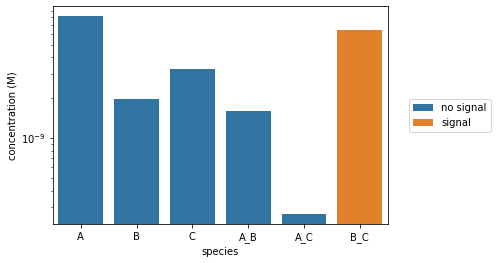

In [16]:
"""
The equilibrium distribution and species producing signal can be visualized with the VisualizeEquilibriumDistribution method
This method plots a bar graph of every species and its concentration at equilibrium, with signaling dimers labelled

"""

example1.VisualizeEquilibriumDistribution()